# Loading data

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Analysis and Visualization

In [17]:
len(df)

303

In [18]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


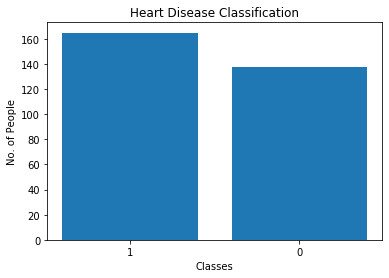

In [20]:
unique_values = df['target'].unique()
x_pos = np.arange(len(unique_values))
plt.bar(x_pos, df['target'].value_counts())
plt.xticks(x_pos, unique_values)
plt.ylabel('No. of People')
plt.xlabel('Classes')
plt.title('Heart Disease Classification')

plt.show()

# Splitting train-test set

In [42]:
from sklearn.model_selection import train_test_split
#X= df.drop(columns = 'target')
#y = df['target']
train = pd.read_csv('Heart_train.csv')
X_train= train.drop(columns = 'target')
y_train = train['target']

test = pd.read_csv('Heart_test.csv')
X_test= test.drop(columns = 'target')
y_test = test['target']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify = y)
print(len(X_train), len(X_test))
print(X_train.shape)
X_test.shape

242 61
(242, 13)


(61, 13)

# One hot Encoding

In [48]:
cat_columns = ['cp', 'exang', 'slope', 'thal']
num_columns = [c for c in X_train.columns if c not in cat_columns]

from sklearn.preprocessing import OneHotEncoder

#Create an OneHotEncoder instance
encoder = OneHotEncoder(handle_unknown = 'ignore')

#Fit on categorical columns
encoder.fit(X_train[cat_columns])

#Transform on training data
X_train_cat_encoded = encoder.transform(X_train[cat_columns])

column_names = encoder.get_feature_names(input_features = cat_columns)
print(X_train_cat_encoded.toarray().shape)
print(X_train_cat_encoded.todense().shape)
print(column_names)

X_train_encoded_df = pd.DataFrame(X_train_cat_encoded.todense(),
                                  columns = column_names,
                                  index = X_train.index)

#X_train_encoded_df.head()
X_train_encoded = pd.concat([X_train[num_columns], X_train_encoded_df], axis = 1)
#X_train_encoded.head()

(242, 13)
(242, 13)
['cp_0' 'cp_1' 'cp_2' 'cp_3' 'exang_0' 'exang_1' 'slope_0' 'slope_1'
 'slope_2' 'thal_0' 'thal_1' 'thal_2' 'thal_3']


In [49]:
#cat_columns = ['cp', 'exang', 'slope', 'thal']
#num_columns = [c for c in X_test.columns if c not in cat_columns]

#from sklearn.preprocessing import OneHotEncoder

#Create an OneHotEncoder instance
#encoder = OneHotEncoder(handle_unknown = 'ignore')

#Fit on categorical columns
#encoder.fit(X_test[cat_columns])

#Transform on training data
X_test_cat_encoded = encoder.transform(X_test[cat_columns])

column_names = encoder.get_feature_names(input_features = cat_columns)
print(X_test_cat_encoded.toarray().shape)
print(X_test_cat_encoded.todense().shape)
print(column_names)

X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded.todense(),
                                  columns = column_names,
                                  index = X_test.index)

#print(X_test_encoded_df.head())
X_test_encoded = pd.concat([X_test[num_columns], X_test_cat_encoded_df], axis = 1)
print(X_test_encoded.shape)

(61, 13)
(61, 13)
['cp_0' 'cp_1' 'cp_2' 'cp_3' 'exang_0' 'exang_1' 'slope_0' 'slope_1'
 'slope_2' 'thal_0' 'thal_1' 'thal_2' 'thal_3']
(61, 22)


# Model, GridSearch and it's Evalution

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#from sklearn.metrics import make_scorer, f1_score

In [51]:
def grid_search_classifier(classifier_class, train_x,train_y,test_x,test_y,grid_params):
    print(classifier)
    #scorer = make_scorer(f1_score, average = 'micro')
    clf = GridSearchCV(classifier_class(random_state=1),
                      grid_params, scoring = 'accuracy')
    
    clf.fit(train_x,train_y)
    print(clf.best_score_, clf.best_params_)
    
    best_model = classifier_class(**clf.best_params_)
    best_model.fit(train_x, train_y)
    y_preds_final = best_model.predict(test_x)
    accuracy= accuracy_score(test_y,y_preds_final)
    return accuracy

In [52]:
classifiers_to_try_out = [
    (AdaBoostClassifier,
    {'n_estimators': [5, 10, 20], 'learning_rate':[0.1, 0.5]}
    ),
    (DecisionTreeClassifier,
    {'max_depth': [3,5, 7, 9,11,13], 'min_samples_split': [2, 4, 6, 8]}
    ),
    (RandomForestClassifier,
    {'n_estimators': [5,10,30],'criterion':['gini','entropy']}
    ),
    (SVC,
    {'kernel':['linear','rbf'], 'C':[1, 10]}
    ),
    (GradientBoostingClassifier,
    {'max_depth': [3,5, 7, 9], 'min_samples_split': [2, 4, 6]})
]

In [53]:
accuracies=[]
for classifier, grid in classifiers_to_try_out:
    accuracy = grid_search_classifier(classifier, X_train_encoded, y_train,X_test_encoded,y_test, grid)
    accuracies.append({'Classifier': str(classifier),'accuracy':accuracy})
    
#print(accuracies)
classwiseaccuracy = pd.DataFrame(accuracies)

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
0.8385204081632655 {'learning_rate': 0.5, 'n_estimators': 10}
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
0.7812925170068027 {'max_depth': 3, 'min_samples_split': 2}
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
0.8264455782312925 {'criterion': 'entropy', 'n_estimators': 30}
<class 'sklearn.svm._classes.SVC'>
0.8142857142857143 {'C': 1, 'kernel': 'linear'}
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
0.79328231292517 {'max_depth': 3, 'min_samples_split': 2}


In [54]:
classwiseaccuracy

,Classifier,accuracy
0,<class 'sklearn.ensemble._weight_boosting.AdaB...,0.836066
1,<class 'sklearn.tree._classes.DecisionTreeClas...,0.819672
2,<class 'sklearn.ensemble._forest.RandomForestC...,0.803279
3,<class 'sklearn.svm._classes.SVC'>,0.836066
4,<class 'sklearn.ensemble._gb.GradientBoostingC...,0.754098
